## Part   1   -   Exploratory   data   analysis
The   attached  logins.json    file   contains   (simulated)   timestamps   of   user  logins  in   a   particular geographic  location.   Aggregate   these  login   counts   based   on   15-minute   time  intervals,   and visualize   and   describe   the   resulting   time   series   of  login   counts  in   ways   that   best   characterize   the underlying   patterns   of   the   demand.   Please   report/illustrate  important   features   of   the   demand, such   as   daily   cycles.   If   there   are   data   quality  issues,   please   report   them. 

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
import seaborn as sns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set()

# open json
with open('logins.json') as f:
    raw = json.load(f)
  
# use normalization to create a table from the nested column
df = json_normalize(raw, 'login_time')
df.columns = ['login_time']
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [518]:
df.shape

(93142, 1)

In [519]:
df.index = pd.to_datetime(df['login_time'], format = "%Y-%m-%d %H:%M:%S")
df.drop(['login_time'], axis = 1, inplace = True)
df['count'] = 1

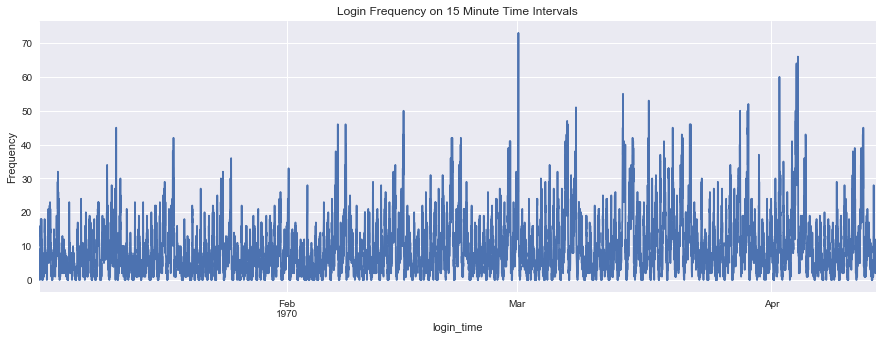

In [521]:
fig, ax = plt.subplots(figsize=(15,5))
interval_counts = df['count'].resample('15min').count()
interval_counts.plot()
ax.set_ylabel('Frequency')
ax.set_title('Login Frequency on 15 Minute Time Intervals')
ax.tick_params(axis='both', which='both', length=0)
plt.show()

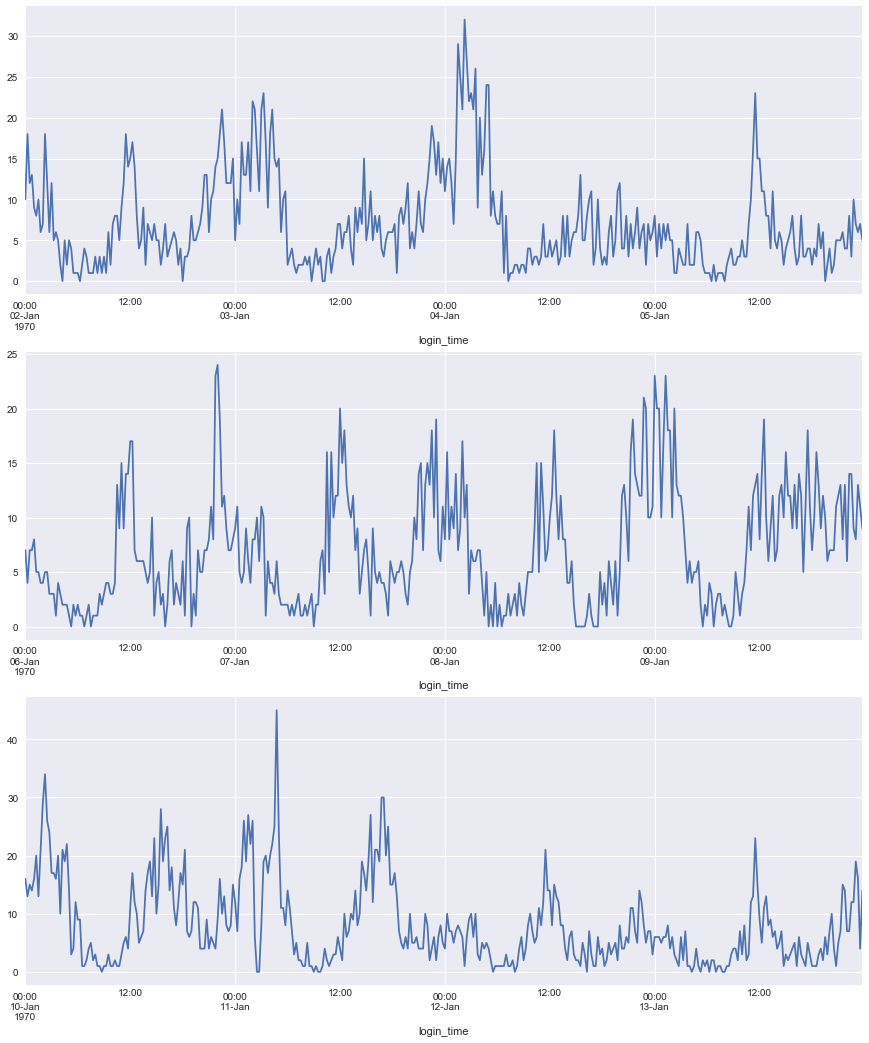

In [522]:
interval_counts = df['count'].resample('15min').count()

fig = plt.figure(figsize = (15,18))
ax1 = fig.add_subplot(3,1,1)
ax1.tick_params(axis='both', which='both', length=0)
interval_counts.loc['1970-01-02':'1970-01-05'].plot()

ax2 = fig.add_subplot(3,1,2)
ax2.tick_params(axis='both', which='both', length=0)
interval_counts.loc['1970-01-06':'1970-01-09'].plot()

ax3 = fig.add_subplot(3,1,3)
ax3.tick_params(axis='both', which='both', length=0)
interval_counts.loc['1970-01-10':'1970-01-13'].plot()

plt.show()

The first plot shows that individual days are dominated by a twice daily cycle, with some higher-than-average peaks occuring about four times each month.  This is possibly explained by weekends.  When we look at the first 13 days on a smaller time scale, we can see that there are typically two cycles in each calendar day.  The peak usage occurs just after 12:00 and at 0:00 on a typical day. 

## Part   2   -   Experiment   and   metrics   design

The   neighboring   cities   of   Gotham   and   Metropolis   have   complementary   circadian   rhythms:   on weekdays,   Ultimate   Gotham  is   most   active   at   night,   and   Ultimate   Metropolis  is   most   active during   the   day.   On   weekends,   there  is   reasonable   activity  in   both   cities. 
However,   a   toll   bridge,   with   a   two-way   toll,   between   the   two   cities   causes   driver   partners   to   tend to   be   exclusive   to   each   city.   The   Ultimate   managers   of   city   operations   for   the   two   cities   have proposed   an   experiment   to   encourage   driver   partners   to   be   available  in   both   cities,   by reimbursing   all   toll   costs. 

<b>1.	What   would   you   choose   as   the   key   measure   of   success   of   this   experiment  in encouraging   driver   partners   to   serve   both   cities,   and   why   would   you   choose   this   metric?</b>
<br><br> The simplest metric to measure would the the ratio of driver's activity in the opposite city. If the program works as intended, we would see that ratio rise as the driver crosses the bridge more often during the periods of low demand in their own city.<br><br>
<b>2.	Describe   a   practical   experiment   you   would   design   to   compare   the   effectiveness   of   the proposed   change  in   relation   to   the   key   measure   of   success.   Please   provide   details   on:
a.	how   you   will  implement   the   experiment</b>
<br><br> If we can assume that data has been collected continuously for some time, we can simply continue collecting data after the plan is implemented.  After a predetermined amount of time, we can analyze the data, comparing the ratios before and after the change was made. <br><br>
<b>b.	what   statistical   test(s)   you   will   conduct   to   verify   the   significance   of   the observation
<br><br></b>It would be very similar to an A/B test, that is, a simple 2-sided hypothesis test.  The null hypothesis is that we see no change in the ratio of drivers rides in the opposite city.    <br><br><b>
c.	how   you   would  interpret   the   results   and   provide   recommendations   to   the   city operations   team   along   with   any   caveats.</b>
<br><br>If a statistically significant result is obtained, we would reject the null hypothesis and state that we have sufficient evidence to state that the amount of drivers crossing the toll bridge to work in the other city is different, and the change is not due to chance. There are limitations. We couldn't state whether the change could be directly attributed to policy.   

## Part   3   -   Predictive   modeling
Ultimate  is  interested  in   predicting   rider   retention.   To   help   explore   this   question,   we   have provided   a   sample   dataset   of   a   cohort   of   users   who   signed   up   for   an   Ultimate   account  in January   2014.   The   data   was   pulled   several   months  later;   we   consider   a   user   retained  if   they were   “active”   (i.e.   took   a   trip)  in   the   preceding   30   days. 
We   would  like   you   to   use   this   data   set   to   help   understand   what   factors   are   the   best   predictors for   retention,   and   offer   suggestions   to   operationalize   those  insights   to   help   Ultimate. 
The   data  is  in   the   attached   file   ultimate_data_challenge.json.   See   below   for   a   detailed description   of   the   dataset.   Please  include   any   code   you   wrote   for   the   analysis   and   delete   the dataset   when   you   have   finished   with   the   challenge. 

1.	Perform   any   cleaning,   exploratory   analysis,   and/or   visualizations   to   use   the   provided data   for   this   analysis   (a   few   sentences/plots   describing   your   approach   will   suffice).   What fraction   of   the   observed   users   were   retained?
2.	Build   a   predictive   model   to   help   Ultimate   determine   whether   or   not   a   user   will   be   active in   their   6th   month   on   the   system.   Discuss   why   you   chose   your   approach,   what alternatives   you   considered,   and   any   concerns   you   have.   How   valid  is   your   model?Include   any   key  indicators   of   model   performance.
3.	Briefly   discuss   how   Ultimate   might  leverage   the  insights   gained   from   the   model   to improve  its  long- term   rider   retention   (again,   a   few   sentences   will   suffice).

## Data   description
●	city:    city   this   user   signed   up  in<br>
●	phone:    primary   device   for   this   user<br>
●	signup_date:    date   of   account   registration;  in   the   form  ‘YYYY MM DD’<br>
●	last_trip_date:    the  last   time   this   user   completed   a   trip;   n   the   form  ‘ YYYY MM DD’<br>
●	avg_dist:    the   average   distance  in   miles   per   trip   taken  in   the   first   30   days   after   signup<br>
●	avg_rating_by_driver:    the   rider’s   average   rating   over   all   of   their   trips<br>
●	avg_rating_of_driver:  the   rider’s   average   rating   of   their   drivers   over   all   of   their   trips<br>
●	surge_pct:    the   percent   of   trips   taken   with   surge   multiplier   >   1<br>
●	avg_surge:    The   average   surge   multiplier   over   all   of   this   user’s   trips<br>
●	trips_in_first_30_days:  the   number   of   trips   this   user   took  in   the   first   30   days   after signing   up<br>
●	ultimate_black_user:    TRUE  if   the   user   took   an   Ultimate   Black  in   their   first   30   days; FALSE otherwise<br>
●	weekday_pct:    the   percent   of   the   user’s   trips   occurring   during   a   weekday<br>

In [523]:
# open json
with open('ultimate_data_challenge.json') as f:
    raw = json.load(f)
  
# use normalization to create a table from the nested column
df = json_normalize(raw)
df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [524]:
df.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
dtype: bool

In [525]:
df.loc[df.phone.isnull()].shape

(396, 12)

396 users have a null value for their phone numbers

In [526]:
df.loc[df.avg_rating_by_driver.isnull()].shape

(201, 12)

201 users have a null value for their rating by driver

In [527]:
df.loc[df.avg_rating_of_driver.isnull()].shape

(8122, 12)

8122 users have a null value for rating of driver

In [528]:
#fill average rating of driver by mean of the column
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

# because there are only about 200 observations left with missing values, we can drop them.
df.dropna(inplace = True)

df.isnull().any()

avg_dist                  False
avg_rating_by_driver      False
avg_rating_of_driver      False
avg_surge                 False
city                      False
last_trip_date            False
phone                     False
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
dtype: bool

Our data is clean, we can proceed.

In [529]:
# convert dates to datetime objects
from datetime import datetime
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format = "%Y-%m-%d") 
df['signup_date'] = pd.to_datetime(df['signup_date'], format = "%Y-%m-%d") 

In [530]:
print("Signups occured between {}".format(min(df.signup_date)) + " and {}".format(max(df.signup_date))+'.')

Signups occured between 2014-01-01 00:00:00 and 2014-01-31 00:00:00.


In [531]:
print("Last trips occured between {}".format(min(df.last_trip_date)) + " and {}".format(max(df.last_trip_date))+'.')

Last trips occured between 2014-01-01 00:00:00 and 2014-07-01 00:00:00.


We will consider a user retained if they took a trip in June 2014.

In [532]:
df['retained'] = np.where(df['last_trip_date']>='2014-06-01', 1, 0)
print('{:.2f}'.format(df['retained'].mean()*100)+'% of users were retained.')

37.72% of users were retained.


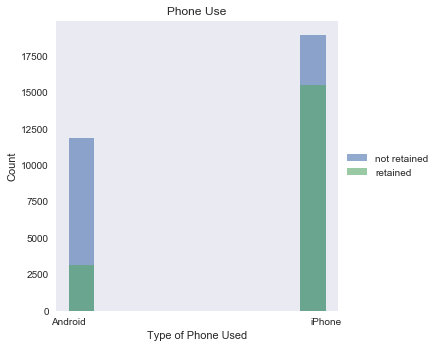

In [534]:
fig, ax = plt.subplots(figsize = (5,5))

#colormap = plt.get_cmap('tab20c')
#ax.set_color_cycle('tab20c')
df.groupby('retained')['phone'].hist(alpha = .6)

ax.set_xlabel('Type of Phone Used')
ax.set_ylabel('Count')
ax.set_title('Phone Use')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(['not retained','retained'], loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.tight_layout()
ax.grid(False)
plt.show()

A higher proportion of iPhone users were retained.

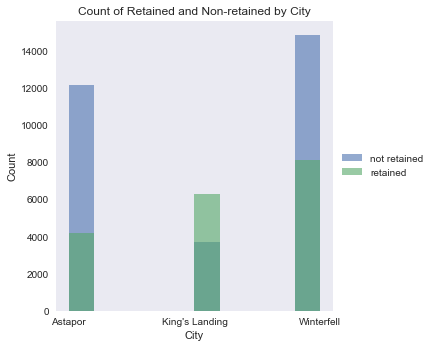

In [535]:
fig, ax = plt.subplots(figsize = (5,5))
df.groupby('retained')['city'].hist(alpha = .6)

ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('Count of Retained and Non-retained by City')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(['not retained','retained'], loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.tight_layout()
ax.grid(False)
plt.show()

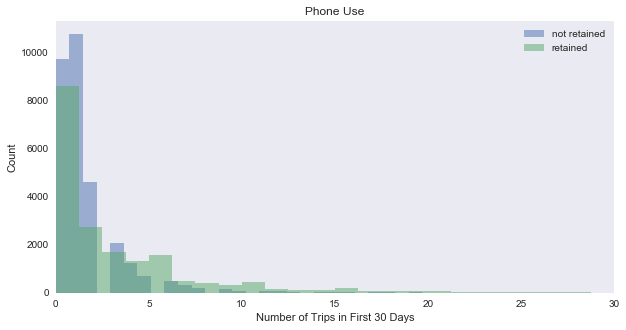

In [536]:
fig, ax = plt.subplots(figsize = (10,5))
df.groupby('retained')['trips_in_first_30_days'].hist(bins = 100, alpha = 0.5)
ax.set_xlim(0,30)
ax.set_xlabel('Number of Trips in First 30 Days')
ax.set_ylabel('Count')
ax.set_title('Phone Use')
ax.legend(['not retained','retained'])
ax.grid(False)
plt.show()

Those retained were more likely to have taken more than 2-3 rides in the first month.

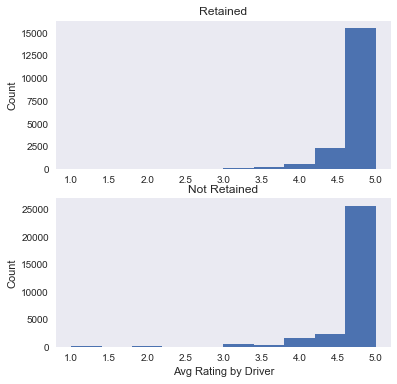

In [537]:
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(2,1,1)
df.loc[df['retained'] == 1]['avg_rating_by_driver'].hist()
ax1.set_ylabel('Count')
ax1.set_title('Retained')
ax1.tick_params(axis='both', which='both', length=0)
ax1.grid(False)

ax2 = fig.add_subplot(2,1,2)
df.loc[df['retained'] == 0]['avg_rating_by_driver'].hist()
ax2.set_xlabel('Avg Rating by Driver')
ax2.set_ylabel('Count')
ax2.set_title('Not Retained')
ax2.tick_params(axis='both', which='both', length=0)
ax2.grid(False)

plt.show()

Those retained had a shallower tail off to the left.  Less lower ratings. 

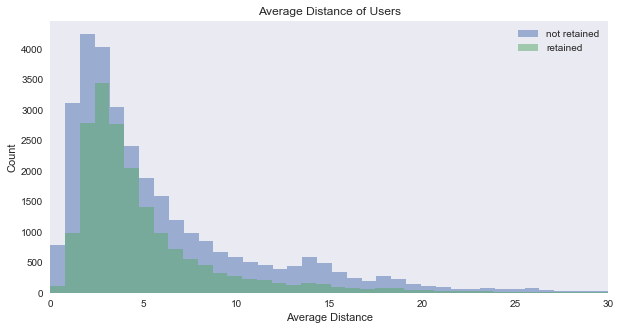

In [538]:
fig, ax = plt.subplots(figsize = (10,5))
df.groupby('retained')['avg_dist'].hist(bins = 100, alpha = 0.5)
ax.set_xlim(0,30)
ax.set_xlabel('Average Distance')
ax.set_ylabel('Count')
ax.set_title('Average Distance of Users')
ax.legend(['not retained','retained'])
ax.grid(False)
plt.show()

In [540]:
df.groupby('retained')['surge_pct'].mean()

retained
0    8.665731
1    9.145758
Name: surge_pct, dtype: float64

Those retained had a slightly higher surge percentage.

In [541]:
df.groupby('retained')['ultimate_black_user'].value_counts()

retained  ultimate_black_user
0         False                  21590
          True                    9181
1         True                    9398
          False                   9237
Name: ultimate_black_user, dtype: int64

A much larger proportion of retained users were ultimate black users.

In [542]:
df.groupby('retained')['trips_in_first_30_days'].mean()

retained
0    1.662442
1    3.310813
Name: trips_in_first_30_days, dtype: float64

Retained users took many more trips in the first 30 days, on average.

In [543]:
df.groupby('retained')['city'].value_counts()

retained  city          
0         Winterfell        14885
          Astapor           12160
          King's Landing     3726
1         Winterfell         8139
          King's Landing     6301
          Astapor            4195
Name: city, dtype: int64

In [544]:
df.groupby('city')['retained'].mean()

city
Astapor           0.256496
King's Landing    0.628403
Winterfell        0.353501
Name: retained, dtype: float64

Users from King's Landing are much more likely to be retained.

In [545]:
df.groupby('retained')['weekday_pct'].mean()

retained
0    60.639040
1    61.366123
Name: weekday_pct, dtype: float64

In [546]:
# feature engineering - create dummy variables
df['kings_landing'] = np.where(df['city'] == "King's Landing", 1, 0)
df['astapor'] = np.where(df['city'] == "Astapor", 1, 0)
df['winterfell'] = np.where(df['city'] == "Winterfell", 1, 0)
df['android'] = np.where(df['phone'] == "Android", 1, 0)
df['iphone'] = np.where(df['phone'] == "iPhone", 1, 0)
df['used_ultimate_black'] = np.where(df['ultimate_black_user'] == True, 1, 0)
df['used_surge'] = np.where(df['surge_pct'] > 0, 1, 0)
df['rating_higher_than_four'] = np.where(df['avg_rating_by_driver'] >= 4, 1, 0)
df['took_at_least_three_trips_in_first30'] = np.where(df['trips_in_first_30_days'] > 3, 1, 0)

In [547]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,kings_landing,astapor,winterfell,android,iphone,used_ultimate_black,used_surge,rating_higher_than_four,took_at_least_three_trips_in_first30
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1,1,0,0,0,1,1,1,1,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0,0,1,0,1,0,0,0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0,0,1,0,0,1,0,0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1,1,0,0,0,1,1,1,1,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,0,1,1,0,0,1,1,1


In [548]:
df.groupby('retained')['used_surge'].mean()

retained
0    0.209385
1    0.483928
Name: used_surge, dtype: float64

In [549]:
df.groupby('retained')['iphone'].mean()

retained
0    0.615840
1    0.831554
Name: iphone, dtype: float64

In [550]:
df.groupby('retained')['kings_landing'].mean()

retained
0    0.121088
1    0.338127
Name: kings_landing, dtype: float64

In [551]:
df.groupby('retained')['used_ultimate_black'].mean()

retained
0    0.298365
1    0.504320
Name: used_ultimate_black, dtype: float64

In [552]:
df.groupby('retained')['used_surge'].mean()

retained
0    0.209385
1    0.483928
Name: used_surge, dtype: float64

We can see large discrepancies in the values between retained and non-retained for all engineered features.

In [553]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split 

X = df.drop(['retained','last_trip_date','signup_date', 'phone', 'city'], axis = 1)
y = df.retained

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
classifier=classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)

In [554]:
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[6132, 1587],
       [1843, 2790]], dtype=int64)

In [555]:

sklearn.metrics.accuracy_score(y_test, predictions)

0.72231217616580312

Our decision tree is about <b>73.93%</b> accurate. 

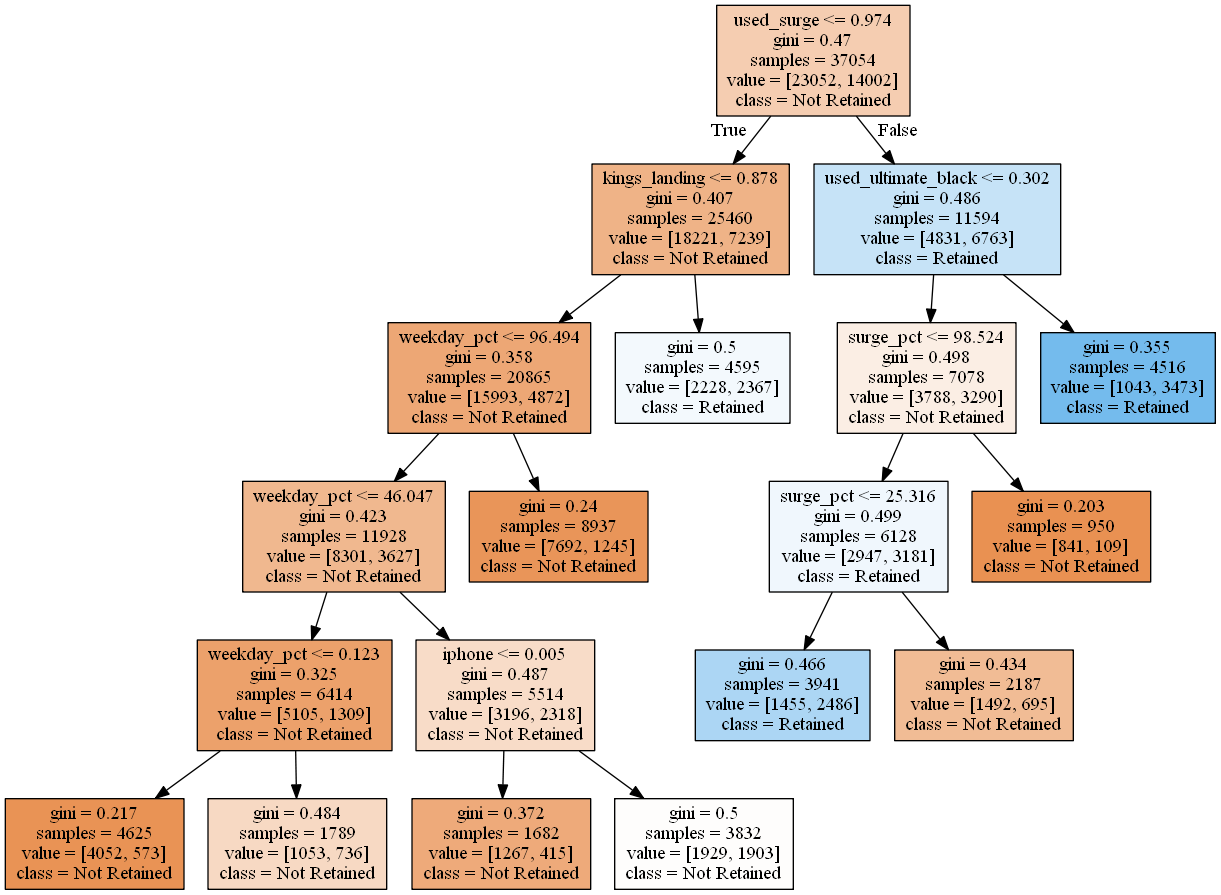

In [556]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, feature_names = X.columns,out_file=out, filled=True, class_names = ['Not Retained','Retained'])
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

Our decision tree determined that the single greatest indicator of an individual being retained is whether they have used surge.  To the right on our decision tree is where it's determined that users have used surge.  The blue indicates majority of users in the category being retained.  The dark blue boxes indicate that having a surge percentage higher than 31% and being an iPhone user make it even more likely to be retained.  Notice the only scenario in which surge users are less likely to be retained is if they do not live in King's Landing.  

To the left of the first node is all users who have not used surge.  Not living in King's Landing is very indicative of not being retained.  In fact, the only large group of retained users who haven't used surge are those who live in King's Landing and who have used ultimate black.  


Notice that the common themes for being retained are: <br>
1) Having using surge<br>
2) Living in King's Landing<br>
3) Using an iPhone<br>
4) Having used ultimate black

Let's try one more model to see if we can improve.

In [557]:
from sklearn.ensemble import GradientBoostingClassifier

X = df.drop(['retained','last_trip_date','signup_date', 'phone', 'city'], axis = 1)
y = df.retained

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier = GradientBoostingClassifier(verbose=True, n_estimators=200)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           1.2812            7.94s
         2           1.2449            7.51s
         3           1.2135            7.21s
         4           1.1861            6.79s
         5           1.1642            6.69s
         6           1.1441            6.68s
         7           1.1268            6.71s
         8           1.1114            6.77s
         9           1.0921            6.73s
        10           1.0800            6.63s
        20           0.9953            6.18s
        30           0.9629            5.83s
        40           0.9437            5.46s
        50           0.9322            5.20s
        60           0.9246            4.89s
        70           0.9197            4.52s
        80           0.9154            4.16s
        90           0.9118            3.79s
       100           0.9090            3.41s
       200           0.8884            0.00s


0.78837435233160624

Our model has an accuracy of nearly <b>79%</b>.  This is a great improvement.  

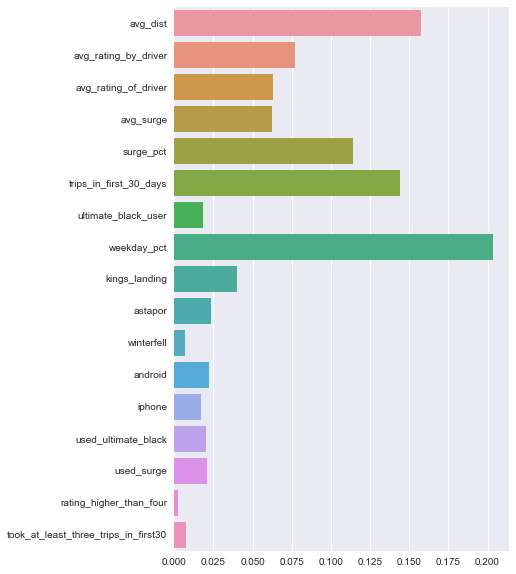

In [558]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns,  x=classifier.feature_importances_)
plt.show()

The feature importance is shown above.  This confirms what the decision tree tells us, but also highlights the importance of using the service during the week, having taken trips in the first 30 days, and the average distance.